<h1><center>Herramientas de Optimización</center></h1>
<h2><center>Jorge Ivan Romero</center></h2>
<h3><center>Programación matemática</center></h3>
<p><center>Doctorado en Ingeniería</center></p>
<p><center>28/08/2021</center></p>

# Programacion matematica


Para comenzar podemos consultar estas dos fuentes:

https://juliabook.chkwon.net/book

https://www.springer.com/gp/book/9781489993250

https://jckantor.github.io/ND-Pyomo-Cookbook/01.02-Running-Pyomo-on-Google-Colab.html

# Pyomo

<img src="https://static1.squarespace.com/static/5492d7f4e4b00040889988bd/t/54a3118ae4b0fe11940f9f58/1621524433093/" >

## Programación Lineal

In [17]:
from pyomo.environ import *

# creamos un modelo
primero = ConcreteModel()

# declare decision variables
primero.x1 = Var(domain=NonNegativeReals)
primero.x2 = Var(domain=NonNegativeReals)

# declare objective
primero.profit = Objective(expr = 40*primero.x1 + 30*primero.x2, sense=maximize)

# declare constraints
primero.demanda = Constraint(expr = primero.x1 <= 40) #demanda
primero.trabajoA = Constraint(expr = primero.x1 + primero.x2 <= 80) # horas semanales
primero.trabajoB = Constraint(expr = 2*primero.x1 + primero.x2 <= 100) # horas semanales


# compute a solution using ipopt for nonlinear optimization
resultados = SolverFactory('cbc').solve(primero).write()

primero.pprint()

# print solutions
R1 = primero.x1()
R2 = primero.x2()
maximo = primero.objective()
print('x1 = ', R1)
print('\nx2 = ', R1)
print('\nOptimo =', maximo)


SyntaxError: invalid syntax (<ipython-input-17-b5e5a00386be>, line 27)

## Programacion no lineal

In [2]:
from pyomo.environ import *

V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

# create a model instance
model = ConcreteModel()

model.q = Var()

# add a model objective
model.objective = Objective(expr = model.q*V*kA*CAf/(model.q + V*kB)/(model.q + V*kA), sense=maximize)

# compute a solution using ipopt for nonlinear optimization
results = SolverFactory('ipopt').solve(model)
model.pprint()


# print solutions
qmax = model.q()
CBmax = model.objective()
print('\nFlowrate at maximum CB = ', qmax, 'liters per minute.')
print('\nMaximum CB =', CBmax, 'moles per liter.')
print('\nProductivity = ', qmax*CBmax, 'moles per minute.')

1 Var Declarations
    q : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 8.944271909985442 :  None : False : False :  Reals

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 40.0*q/(q + 4.0)/(q + 20.0)

2 Declarations: q objective

Flowrate at maximum CB =  8.944271909985442 liters per minute.

Maximum CB = 0.954915028125263 moles per liter.

Productivity =  8.541019662483748 moles per minute.


# Ejemplos JuMP
<img src="https://repository-images.githubusercontent.com/6150069/b0bd9680-87c6-11e9-8754-1ec0566605e8" >

# Programacion lineal

$$
\max \quad x_{1}+2 x_{2}+5 x_{3}
$$
subject to
$$
\begin{aligned}
-x_{1}+x_{2}+3 x_{3} & \leq-5 \\
x_{1}+3 x_{2}-7 x_{3} & \leq 10 \\
0 \leq x_{1} & \leq 10 \\
x_{2} & \geq 0 \\
x_{3} & \geq 0
\end{aligned}
$$

In [1]:
using JuMP, GLPK

# Preparing an optimization model
m = Model(GLPK.Optimizer)

# Declaring variables
@variable(m, 0<= x1 <=10)
@variable(m, x2 >=0)
@variable(m, x3 >=0)


# Setting the objective
@objective(m, Max, x1 + 2x2 + 5x3)

# Adding constraints
@constraint(m, constraint1, -x1 +  x2 + 3x3 <= -5)
@constraint(m, constraint2,  x1 + 3x2 - 7x3 <= 10)

# Printing the prepared optimization model
print(m)

# Solving the optimization problem
JuMP.optimize!(m)

# Printing the optimal solutions obtained
println("Optimal Solutions:")
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))
println("x3 = ", JuMP.value(x3))

# Printing the optimal dual variables
println("Dual Variables:")
println("dual1 = ", JuMP.shadow_price(constraint1))
println("dual2 = ", JuMP.shadow_price(constraint2))


Optimal Solutions:
x1 = 10.0
x2 = 2.1875
x3 = 0.9375
Dual Variables:
dual1 = 1.8125
dual2 = 0.06249999999999998


# vamos con un ejemplo no lineal de una variable no restringida

$$12x5 -975x4+28000x3-345000x2+1800000x$$

<center>sujeto a</center>

$$31>=x>=0$$


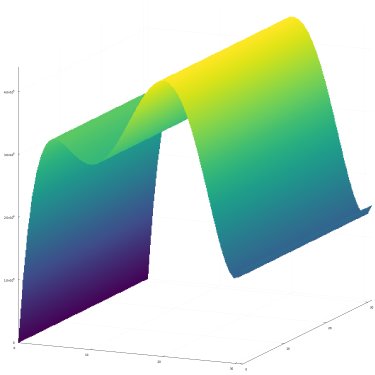

In [22]:
using Plots; gr()

x = range(0, 31, length=50)
y=x
surface(
  x, x, (x, y)->12x^5-975x^4+28000x^3-345000x^2+1800000x, c=:viridis, legend=:none,
  nx=50, ny=50, display_option=Plots.GR.OPTION_SHADED_MESH  # <-- series[:extra_kwargs]
)
plot!(size=(1500,1500))

In [6]:
using JuMP,Ipopt

clase=Model(Ipopt.Optimizer)
@variable(clase,31>=x>=0,start=0)
@NLobjective(clase,Max,12x^5-975x^4+28000x^3-345000x^2+1800000x)
print(clase)
JuMP.optimize!(clase)

println("el maximo valor es=",JuMP.getobjectivevalue(clase))
println("x= ",JuMP.value(x))

This is Ipopt version 3.13.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        1
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

In [10]:
from pyomo.environ import *

model = ConcreteModel()
model.x = Var(domain=NonNegativeReals,initialize=12) #,initialize=15
model.objective = Objective(expr = 12*model.x**5-975*model.x**4+28000*model.x**3-345000*model.x**2+1800000*model.x, sense=maximize)
model.demand = Constraint(expr = model.x <= 31)
results = SolverFactory('ipopt').solve(model)
solucion = model.x()
maximo = model.objective()
print('La solucion es = ', solucion)
print('\nOptimo =', maximo)

La solucion es =  19.999999999998558

Optimo = 4400000.000000015


<h1><center>Gracias por su atención</center></h1>